# Research Methods Talk 16th Dec 2020
###Practical session Part 1
First we need to import our data as a .csv file.

*   We will use [pandas](https://pandas.pydata.org/) to do this.
*   We are using Colab (short for Colaboratory) to access our data and run some statistical tests on that data! 



In [ ]:
#load our dependencies 
from google.colab import files
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

print("pd v = {}\nnp v = {}".format(pd.__version__, np.__version__))

pd v = 1.1.5
np v = 1.18.5


In [ ]:
#we will upload from our local drive 
#run this cell and select the file from your computer...
from google.colab import files
uploaded = files.upload()

Saving cat_dog.csv to cat_dog (6).csv


In [ ]:
#now we can load the cat_dog.csv into a pd DataFrame to view 
import io
df = pd.read_csv(io.BytesIO(uploaded['cat_dog.csv']))

#lets view our data
df

,Timestamp,What gender are you?,How old are you?,I like cats,I like dogs
0,2020/12/13 2:44:59 pm GMT,Male,38,1,5
1,2020/12/13 3:08:41 pm GMT,Female,36,1,3
2,2020/12/13 3:21:39 pm GMT,Male,37,1,1
3,2020/12/13 3:46:55 pm GMT,Female,42,4,2
4,2020/12/13 4:11:59 pm GMT,Male,38,5,5
5,2020/12/13 4:23:38 pm GMT,Male,37,2,1
6,2020/12/13 4:45:09 pm GMT,Male,36,3,5
7,2020/12/13 5:29:32 pm GMT,Male,37,4,2


In [ ]:
#remove the Timestamp as it is not really needed now
del df['Timestamp']
#the column headers are a little long - let's update them
df.columns = ["gender", "age", "cats", "dogs"]
#add an ID number 
#df.insert(loc=0, column='id', value=np.arange(len(df)))
df.insert(loc=0, column='id', value=df.index + 1)

#lets view our data again - it should be a bit neater
df

,id,gender,age,cats,dogs
0,1,Male,38,1,5
1,2,Female,36,1,3
2,3,Male,37,1,1
3,4,Female,42,4,2
4,5,Male,38,5,5
5,6,Male,37,2,1
6,7,Male,36,3,5
7,8,Male,37,4,2


In [ ]:
#print a few basic statistics
#what variable is missing? 
df.describe()

,id,age,cats,dogs
count,8.00000,8.00000,8.00000,8.000000
mean,4.50000,37.62500,2.62500,3.000000
std,2.44949,1.92261,1.59799,1.772811
min,1.00000,36.00000,1.00000,1.000000
25%,2.75000,36.75000,1.00000,1.750000
50%,4.50000,37.00000,2.50000,2.500000
75%,6.25000,38.00000,4.00000,5.000000
max,8.00000,42.00000,5.00000,5.000000


In [ ]:
#we can also use head and tail to print rows of data out - insert a number argument 
#this can be useul for larger data sets
print("df head = \n{}\ndf tail = \n{}".format(df.head(3), df.tail(3)))

df head = 
   id  gender  age  cats  dogs
0   1    Male   38     1     5
1   2  Female   36     1     3
2   3    Male   37     1     1
df tail = 
   id gender  age  cats  dogs
5   6   Male   37     2     1
6   7   Male   36     3     5
7   8   Male   37     4     2


In [ ]:
#desciptive stats - how many males vs females are there?

#calculate count
counts = df["gender"].value_counts()
#calculate a basic percentage number
percent = df["gender"].value_counts(normalize=True)
#calculate a basic percentage number with % sign 
percent100 = df["gender"].value_counts(normalize=True).mul(100).round(1).astype(str) + "%"
#create a new dataframe to view the data
df_gender = pd.DataFrame({"gender_count" : counts, "percentage" : percent100})
print(df_gender)

        gender_count percentage
Male               6      75.0%
Female             2      25.0%


#Run a paired-samples t-test

Do we have a prediction based on our sample? 
Will there be a preference for dogs or cats?

Remember we have assumptions... 

1.   A continuous variable (we assume yes - our preference scores)
2.   Two related groups (yes same participants)
3.   No significant outliers in the differences between the two related groups ([Test with boxplots - python tutorial](https://statinfer.com/104-3-5-box-plots-and-outlier-dectection-using-python))
4.   The distribution of these differences should be approximately normally distributed 

However, the paired-samples t-test is considered "robust" to violations of normality. This means that violations of this assumption can be somewhat tolerated

See [this link](https://statistics.laerd.com/premium/spss/pstt/paired-samples-t-test-in-spss-7.php) for a full description of these assumptions. 

The hypothesis being test is:

* Null hypothesis (H0): ud = 0, which translates to the mean difference between sample 1 and sample 2 is equal to 0.
* Alternative hypothesis (HA): ud ≠ 0, which translates to the mean difference between sample 1 and sample 2 is not equal to 0.
* If the p-value is less than .05, we can reject the null hypothesis.

In [ ]:
#first lets look at some descriptives on our two key variables again
#look at the mean value - this should provide a clue
df[['dogs','cats']].describe()

,dogs,cats
count,8.000000,8.00000
mean,3.000000,2.62500
std,1.772811,1.59799
min,1.000000,1.00000
25%,1.750000,1.00000
50%,2.500000,2.50000
75%,5.000000,4.00000
max,5.000000,5.00000


Difference values
0    4
1    2
2    0
3   -2
4    0
5   -1
6    2
7   -2
dtype: int64


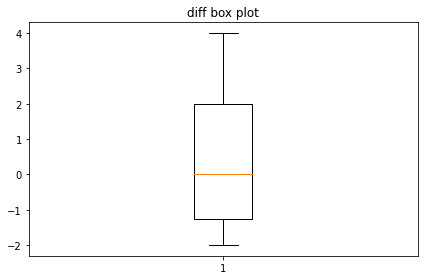

In [ ]:
#Lets look for some outliers... 
#We need to calculate a differnce score
#simply subtract dogs from cats 
diffs = df['dogs'] - df['cats']
print("Difference values\n{}".format(diffs))
%matplotlib inline 

plt.title("diff box plot")
plt.boxplot(diffs)
plt.tight_layout()

In [ ]:
#Now to test that the data came from a normal distribution
#The Shapiro-Wilk test is recommended if you have small sample sizes (< 50 participants) 
stats.shapiro(diffs)
#The first value is the W test value, and the second value it the p-value.
#If the assumption of normality is met the significance level should be more than .05 (i.e., p > .05).

(0.921920657157898, 0.44564154744148254)

In [ ]:
#Finally lets run the t-test only if we can say all assumtions are met! 
stats.ttest_rel(df['cats'], df['dogs'])
#if the p value < .05 the test is significant 
#if it is significant and you have many questions you could run further 
#t-tests to see which questions are driving the effect

Ttest_relResult(statistic=-0.4970501217477084, pvalue=0.6343826406237311)

#Run a Wilcoxon signed-rank test
The Wilcoxon signed-rank test is the non-parametric alternative to the dependent t-test.

Do we have a prediction based on our sample? 
Will there be a preference for dogs or cats?

Remember we have assumptions... 

1.   A continuous variable (we assume yes - our preference scores)
2.   Two related groups (yes same participants)
3.   The distribution of the differences bwetween groups should be approximately symmetrical in shape


See [this link](https://statistics.laerd.com/premium/spss/wsrt/wilcoxon-signed-rank-test-in-spss-3.php) for a full description of these assumptions.

The hypothesis being test is:

*  Null hypothesis (H0): The difference between the pairs follows a symmetric distribution around zero.
* Alternative hypothesis (HA): The difference between the pairs does not follow a symmetric distribution around zero.
* If the p-value is less than .05, we can reject the null hypothesis.

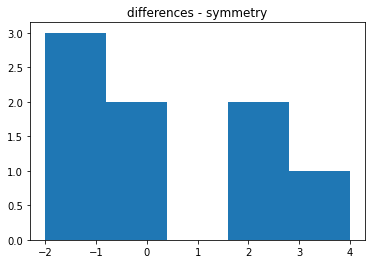

In [ ]:
#So lets test the assumption that the distribution of the differences bwetween groups is approximately symmetrical in shape
#We can use a histogram to test this.
#Looking at the histogram you need to make a judgement about whether the distribution is symmetrical. 
#By visually inspecting the shape of this distribution of difference scores
# An "interface" to matplotlib.axes.Axes.hist() method

plt.hist(diffs, bins = 5)
plt.title("differences - symmetry")
plt.show()

In [ ]:
#so lets run the Wilcoxon signed-rank test
stats.wilcoxon(df['cats'], df['dogs'])
#if the p value < .05 the test is significant 
#if it is significant and you have many questions you could run further 
#test to see which questions are driving the effect

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=8.0, pvalue=0.5897737906589078)